In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the .xlsm file
df = pd.read_excel('/content/DATA_premimum.xlsx', engine='openpyxl')





In [ ]:
# Display the first few rows and column names to confirm
print(df.head())
print(df.columns)

                    Province Gender  x Age                       Concat  \
0  Newfoundland and Labrador      M      0  Newfoundland and LabradorM0   
1  Newfoundland and Labrador      M      1  Newfoundland and LabradorM1   
2  Newfoundland and Labrador      M      2  Newfoundland and LabradorM2   
3  Newfoundland and Labrador      M      3  Newfoundland and LabradorM3   
4  Newfoundland and Labrador      M      4  Newfoundland and LabradorM4   

   lx Number of survivors  dx Number of deaths       qx          Cx  \
0           100000.000000           458.000000  0.00458  443.723206   
1            99542.000000            74.656500  0.00075   70.074653   
2            99467.343500            42.770958  0.00043   38.894569   
3            99424.572542            26.844635  0.00027   23.650708   
4            99397.727908            17.891591  0.00018   15.271521   

             Dx2            Mx             Rx            Nx            Sx  \
0  100000.000000  10070.673827  656444.302235

In [ ]:
# Rename columns to remove spaces for easier access
df.rename(columns={
    'x Age': 'Age',
    'qx (probability of death)': 'qx',
    'lx Number of survivors': 'lx',
    'dx Number of deaths': 'dx',
    'Cx': 'Annual Premium'
}, inplace=True)



In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Province'] = label_encoder.fit_transform(df['Province'])

In [ ]:
# Define features and target
X = df[['Age', 'Gender', 'Province', 'qx']]  # Independent variables
y = df['Annual Premium']  # Target variable


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)



In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2644.91737022142
R-squared: 0.5630081360319097


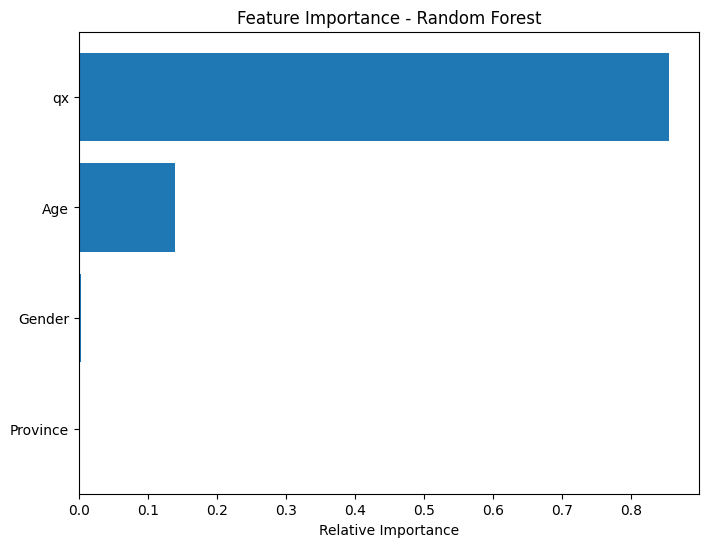

In [ ]:
# Feature importance plot for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), np.array(X.columns)[indices])
plt.xlabel("Relative Importance")
plt.show()

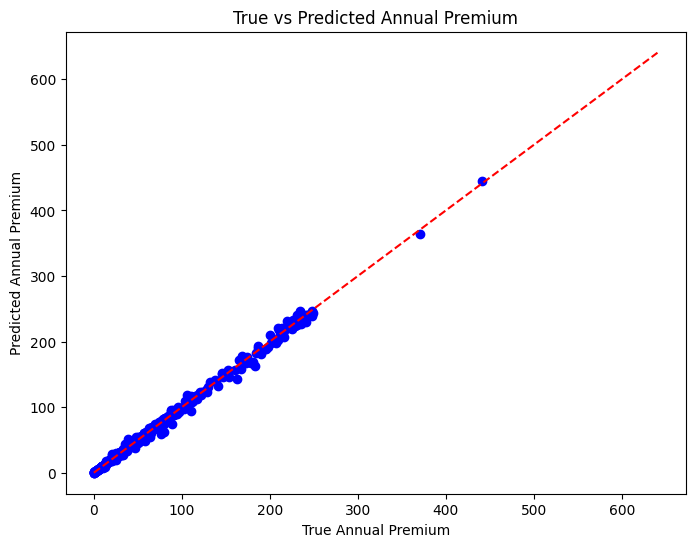

In [ ]:
# True vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('True vs Predicted Annual Premium')
plt.xlabel('True Annual Premium')
plt.ylabel('Predicted Annual Premium')
plt.show()




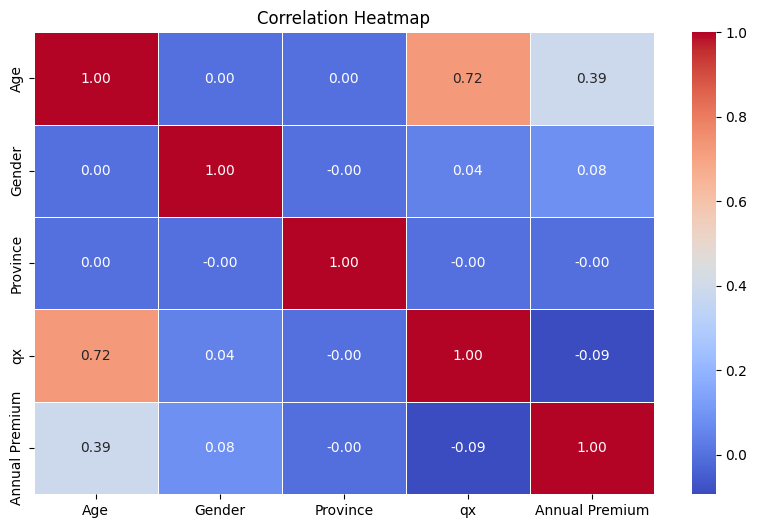

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Gender', 'Province', 'qx', 'Annual Premium']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides insights into the relationships between variables in the dataset. Here are the key takeaways:

Strongest Correlation: The variable qx (probability of death) has the highest positive correlation (0.72) with Age. This makes sense as probability of death generally increases with age, indicating that age is a significant factor in calculating life expectancy.

Annual Premium Correlations:

Age shows a moderate positive correlation (0.39) with Annual Premium, suggesting that as age increases, so does the premium. This aligns with the typical insurance pricing, where older individuals may have higher premiums due to increased risk.
Gender has a weak correlation (0.08) with Annual Premium, indicating that it has little impact on premium predictions in this dataset.
Province and qx both show very weak correlations with Annual Premium, suggesting that location (Province) and qx do not significantly affect premium amounts in the current dataset.
Gender and Province: There is almost no correlation between Gender and Province with other variables, suggesting that these demographic factors might not strongly influence the insurance premium in this dataset.

In summary, Age appears to be the most relevant predictor for Annual Premium, followed by qx probability of death . Gender and Province show minimal influence. This analysis suggests that focusing on age and probability of death (qx) could provide the most value in developing a premium calculation model for Zenith Life Insurance.


This data suggests that gender and province have minimal impact on premium calculations and are not significant factors in determining the premium amount.








<ipython-input-68-8343a5f7e297>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_survival.index, y=province_survival.values, palette="viridis")


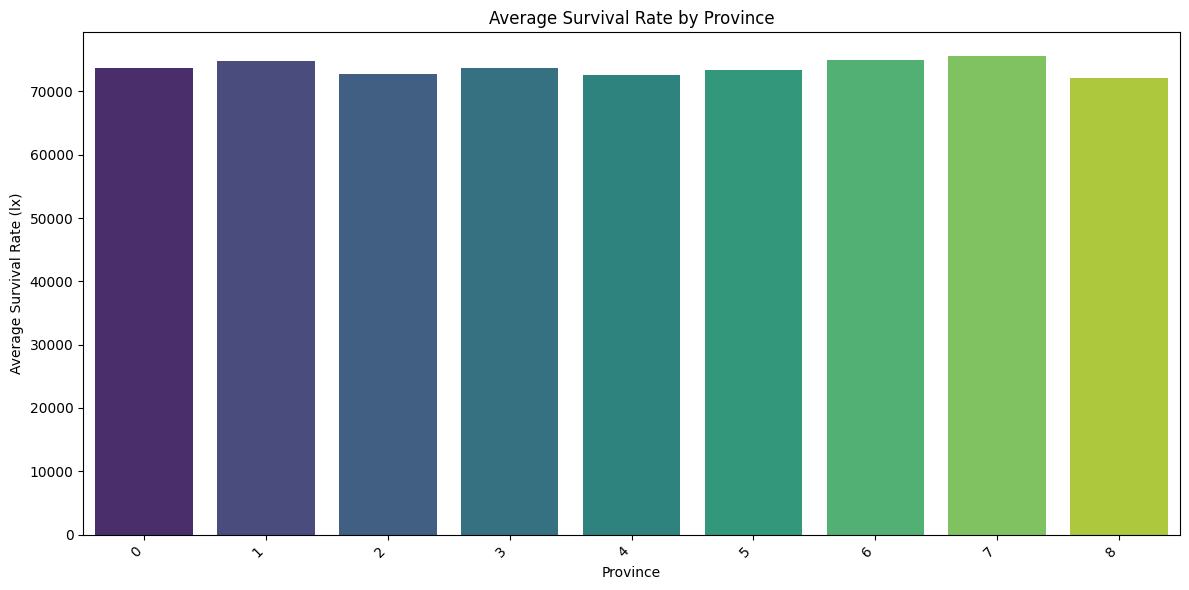

In [ ]:
df.rename(columns={
    'Province': 'Province',
    'Gender': 'Gender',
    'x Age': 'Age',
    'lx Number of survivors': 'lx',
    'dx Number of deaths': 'dx',
    'qx': 'qx',
    'Annual Premium 10 year policy without additional expences': 'Annual Premium'
}, inplace=True)

# Calculate the average survival rate (lx) by province
province_survival = df.groupby('Province')['lx'].mean().sort_values(ascending=False)

# Plot the average survival rate by province with province names labeled
plt.figure(figsize=(12, 6))
sns.barplot(x=province_survival.index, y=province_survival.values, palette="viridis")
plt.title('Average Survival Rate by Province')
plt.xlabel('Province')
plt.ylabel('Average Survival Rate (lx)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()
